In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set(color_codes=True)
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style="white")

In [2]:
data = pd.read_csv('accidents_2009_to_2011.csv',parse_dates=True, index_col=0)
data.head(10)
data

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200901BS70001,524910,180800,-0.201349,51.512273,1,2,2,1,01/01/2009,5,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002882,2009
200901BS70002,525050,181040,-0.199248,51.514399,1,2,2,11,05/01/2009,2,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002886,2009
200901BS70003,526490,177990,-0.179599,51.486668,1,3,2,1,04/01/2009,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002912,2009
200901BS70004,524800,180300,-0.203110,51.507804,1,2,2,1,05/01/2009,2,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes,E01002871,2009
200901BS70005,526930,177490,-0.173445,51.482076,1,2,2,1,06/01/2009,3,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002840,2009
200901BS70006,526060,178730,-0.185525,51.493415,1,3,2,3,01/01/2009,5,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002839,2009
200901BS70007,526580,177270,-0.178561,51.480177,1,2,2,1,08/01/2009,5,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002841,2009
200901BS70008,526550,178580,-0.178524,51.491957,1,3,1,1,02/01/2009,6,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002835,2009
200901BS70009,527310,179100,-0.167395,51.496460,1,3,1,2,07/01/2009,4,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002819,2009


In [3]:
print(data.shape)

(469442, 32)


In [4]:
print(data.dtypes)

Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_Detail                                float64
Junction_C

In [29]:
data1 = data[['Number_of_Casualties']]
dataneigh = np.array(data1)
print(len(dataneigh[:,0]))
neibr = pd.factorize(dataneigh[:,0])
print(neibr)
print(len(set(neibr[0])))
data=data.drop('Number_of_Casualties', axis=1)
data['Number_of_Casualties']=neibr[0]
data.fillna(0)
data=data.drop(['Junction_Detail'], axis=1)
print(data.dtypes)
print(data)

469442
(array([0, 1, 0, ..., 0, 0, 2], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64))
33
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Ty

In [21]:
data

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Date,Day_of_Week,Time,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Number_of_Casualties
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200901BS70001,524910,180800,-0.201349,51.512273,1,2,2,01/01/2009,5,15:11,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002882,2009,0
200901BS70002,525050,181040,-0.199248,51.514399,1,2,2,05/01/2009,2,10:59,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002886,2009,1
200901BS70003,526490,177990,-0.179599,51.486668,1,3,2,04/01/2009,1,14:19,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002912,2009,0
200901BS70004,524800,180300,-0.203110,51.507804,1,2,2,05/01/2009,2,08:10,...,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes,E01002871,2009,0
200901BS70005,526930,177490,-0.173445,51.482076,1,2,2,06/01/2009,3,17:25,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002840,2009,0
200901BS70006,526060,178730,-0.185525,51.493415,1,3,2,01/01/2009,5,11:48,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002839,2009,2
200901BS70007,526580,177270,-0.178561,51.480177,1,2,2,08/01/2009,5,13:58,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002841,2009,0
200901BS70008,526550,178580,-0.178524,51.491957,1,3,1,02/01/2009,6,13:18,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002835,2009,0
200901BS70009,527310,179100,-0.167395,51.496460,1,3,1,07/01/2009,4,12:15,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002819,2009,3


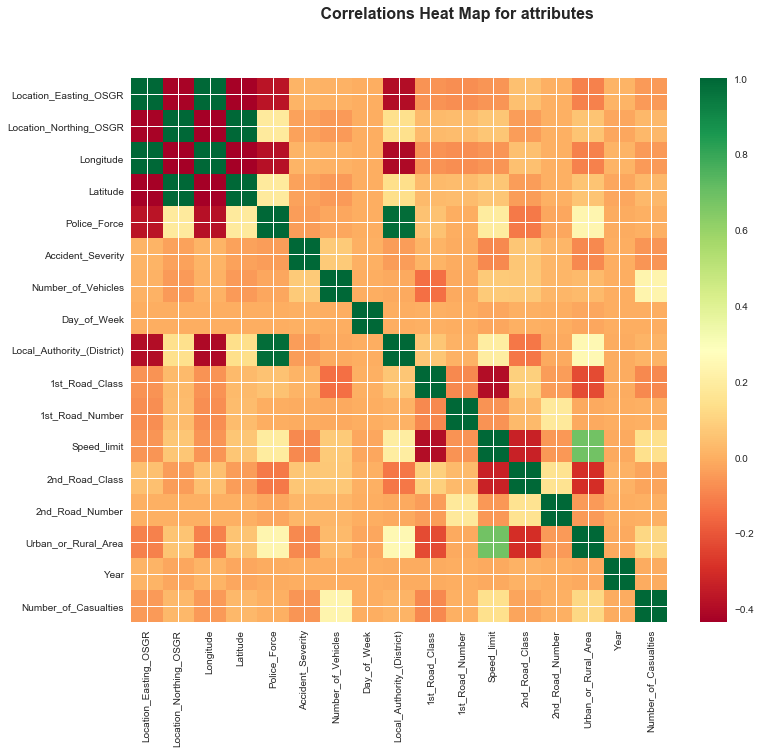

In [30]:
corltn=data.corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(12, 10))
plt.imshow(corltn, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')
plt.show()

In [31]:
couple_columns = data[['Number_of_Vehicles','Accident_Severity','Urban_or_Rural_Area']]
data.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Date,Day_of_Week,Time,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Number_of_Casualties
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200901BS70001,524910,180800,-0.201349,51.512273,1,2,2,01/01/2009,5,15:11,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002882,2009,0
200901BS70002,525050,181040,-0.199248,51.514399,1,2,2,05/01/2009,2,10:59,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002886,2009,1
200901BS70003,526490,177990,-0.179599,51.486668,1,3,2,04/01/2009,1,14:19,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002912,2009,0
200901BS70004,524800,180300,-0.203110,51.507804,1,2,2,05/01/2009,2,08:10,...,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes,E01002871,2009,0
200901BS70005,526930,177490,-0.173445,51.482076,1,2,2,06/01/2009,3,17:25,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002840,2009,0


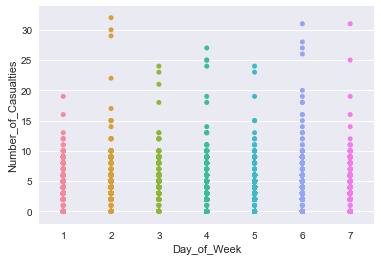

In [32]:
sns.stripplot(x="Day_of_Week", y="Number_of_Casualties", data=data);

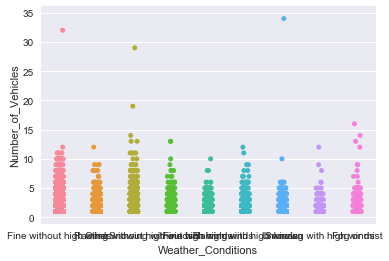

In [34]:
sns.stripplot(x="Weather_Conditions", y="Number_of_Vehicles", data=data, jitter=True);

In [ ]:
sns.lmplot(x="Number_of_Vehicles", y="Number_of_Casualties", data=data, hue="Year")

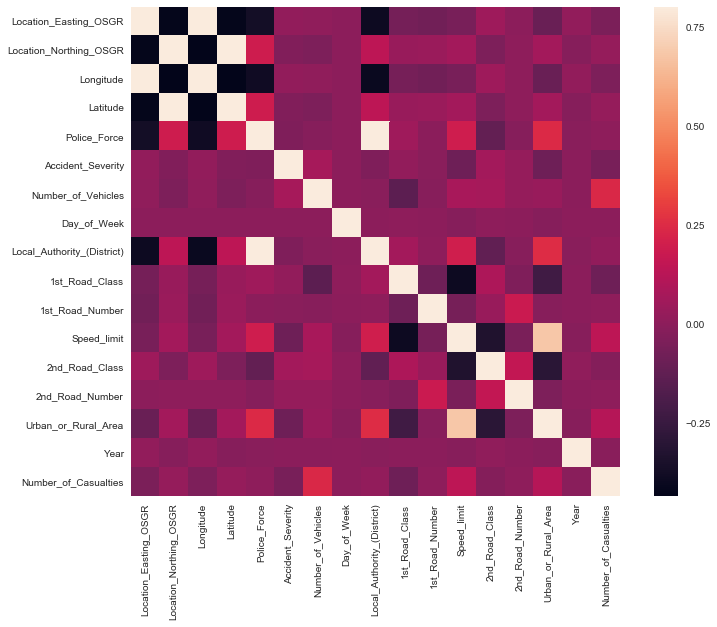

In [38]:
sns.set(style="white")
f,ax = plt.subplots(figsize = (12,9))
corl = data.corr()
sns.heatmap(corl,vmax =.8,square = True);

In [41]:
with open('C:/ODU Semester 2/Data Science with Python/Python/accidents_2009_to_2011.csv', 'r') as f:
    acc = pd.read_csv(f,encoding='utf-8')

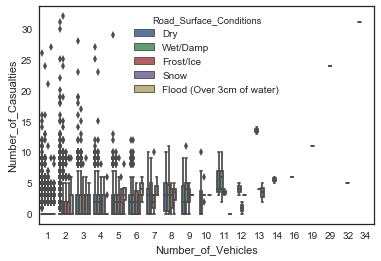

In [53]:
sns.boxplot(x="Number_of_Vehicles", y="Number_of_Casualties", hue="Road_Surface_Conditions" , data=data);

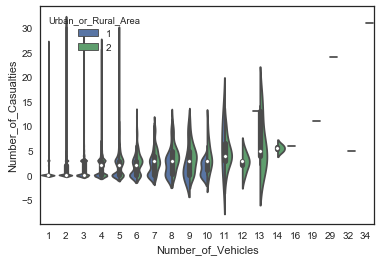

In [56]:
sns.violinplot(x="Number_of_Vehicles", y="Number_of_Casualties", hue="Urban_or_Rural_Area", data=data, split=True);

In [ ]:
g = sns.pairplot(data(['Number_of_Casualties', 'Number_of_Vehicles']), hue="Road_Surface_Conditions")